# NIH Dataset EDA

In [22]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')  # For SCC compatibility (no display)
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import torchvision.datasets as datasets

# Evaluation Metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# For reproducibility
import random


In [29]:
# Set the path where dataset CSV files are stored on the cluster
data_path = "/projectnb/dl4ds/projects/dca_project/nih_data"  # Change this to your actual dataset path

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the CSV files
bbox_df = pd.read_csv(os.path.join(data_path, "BBox_List_2017.csv"))
data_entry_df = pd.read_csv(os.path.join(data_path, "Data_Entry_2017.csv"))



# Display basic info
print("Bounding Box Data:--------------------------------------------------------------")
print(bbox_df.head())
print("\nImage Metadata:---------------------------------------------------------------")
print(data_entry_df.head())



Bounding Box Data:--------------------------------------------------------------
        Image Index Finding Label     Bbox [x           y           w          h]  Unnamed: 6  Unnamed: 7  Unnamed: 8
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   79.186441         NaN         NaN         NaN
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525  313.491525         NaN         NaN         NaN
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644  216.949153         NaN         NaN         NaN
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   55.322034         NaN         NaN         NaN
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   78.101695         NaN         NaN         NaN

Image Metadata:---------------------------------------------------------------
        Image Index          Finding Labels  Follow-up #  Patient ID  Patient Age Patient Gender View Position  OriginalImage[Width

Images found: ['00000976_005.png', '00000921_000.png', '00000132_001.png', '00001315_002.png', '00000643_004.png']


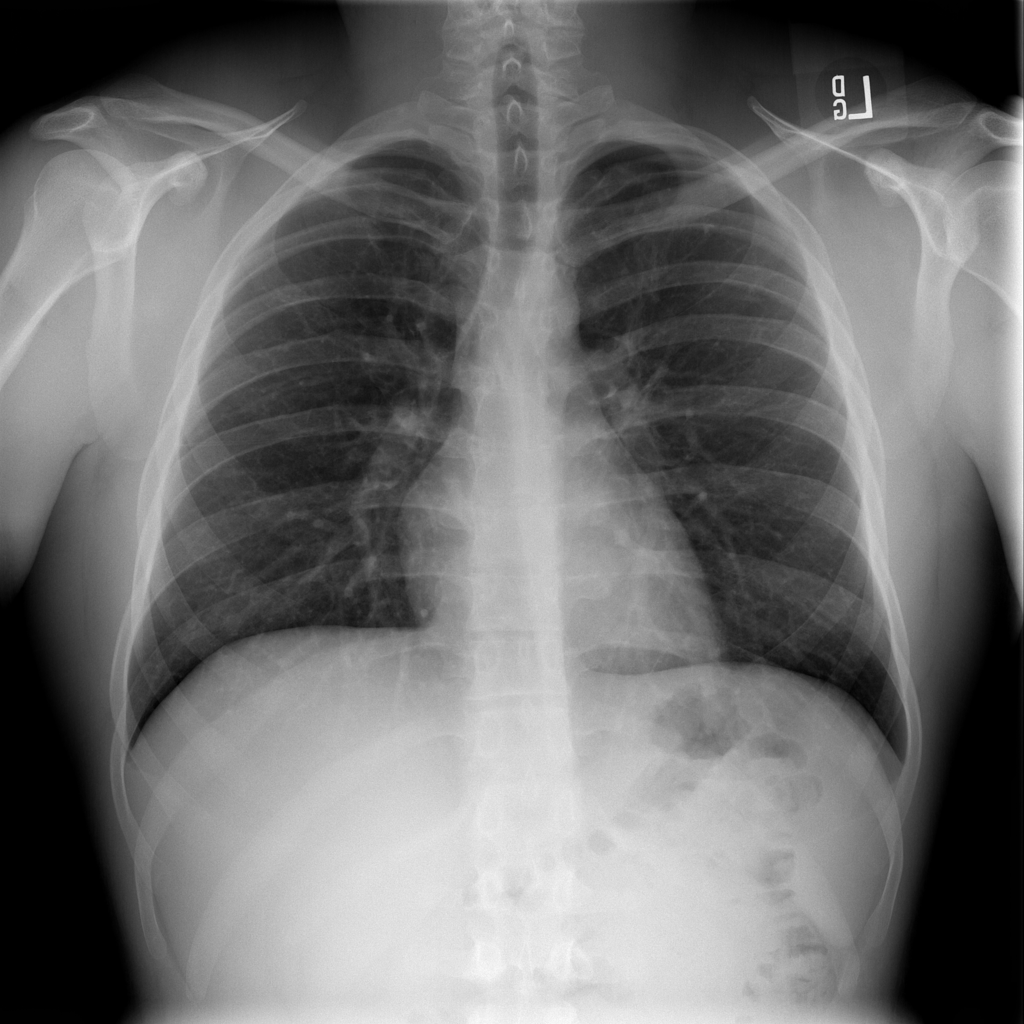

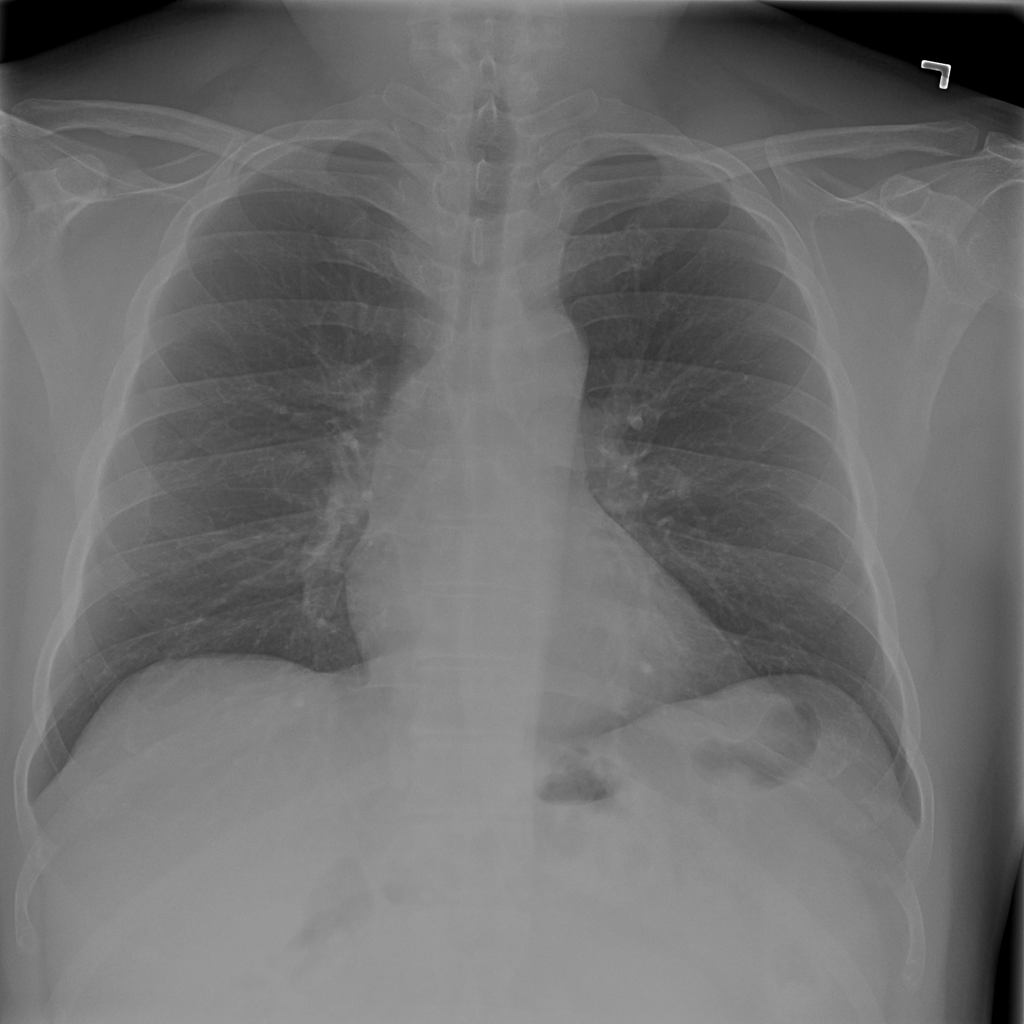

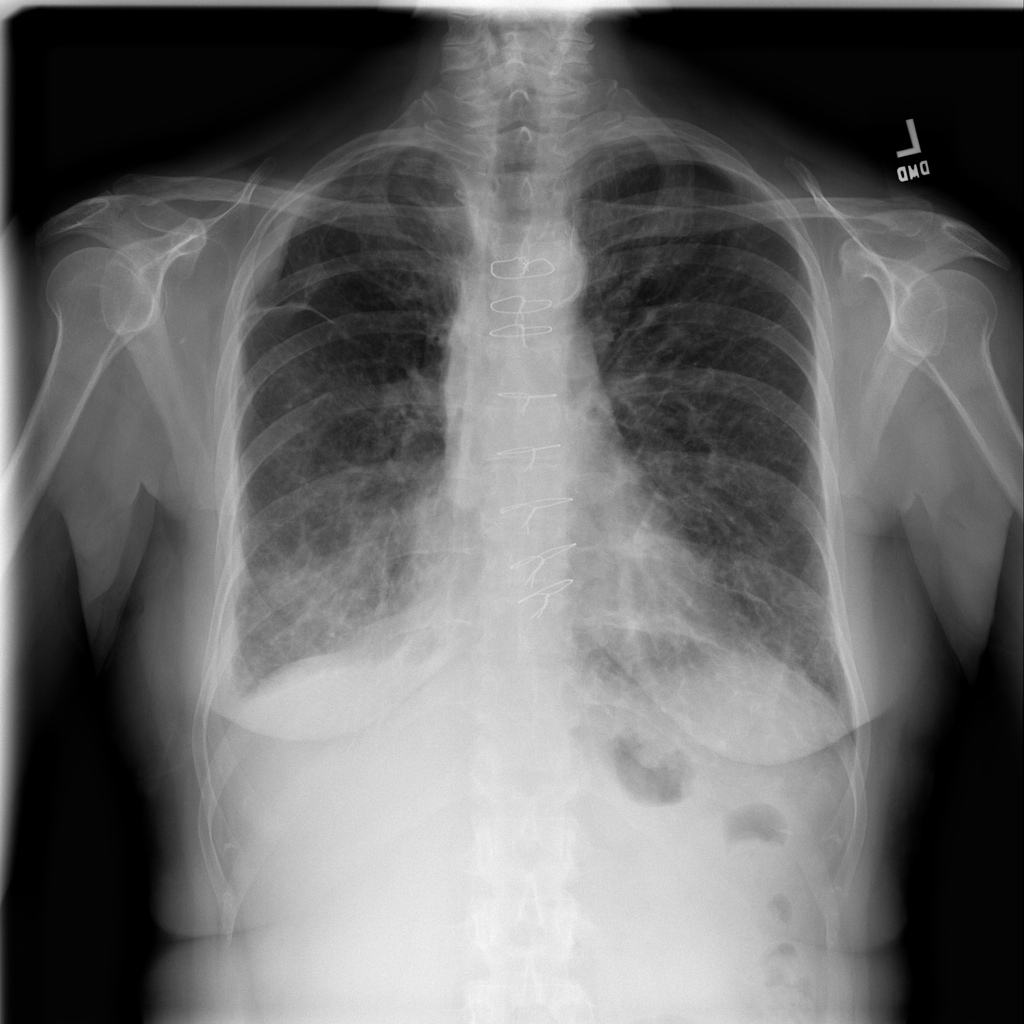

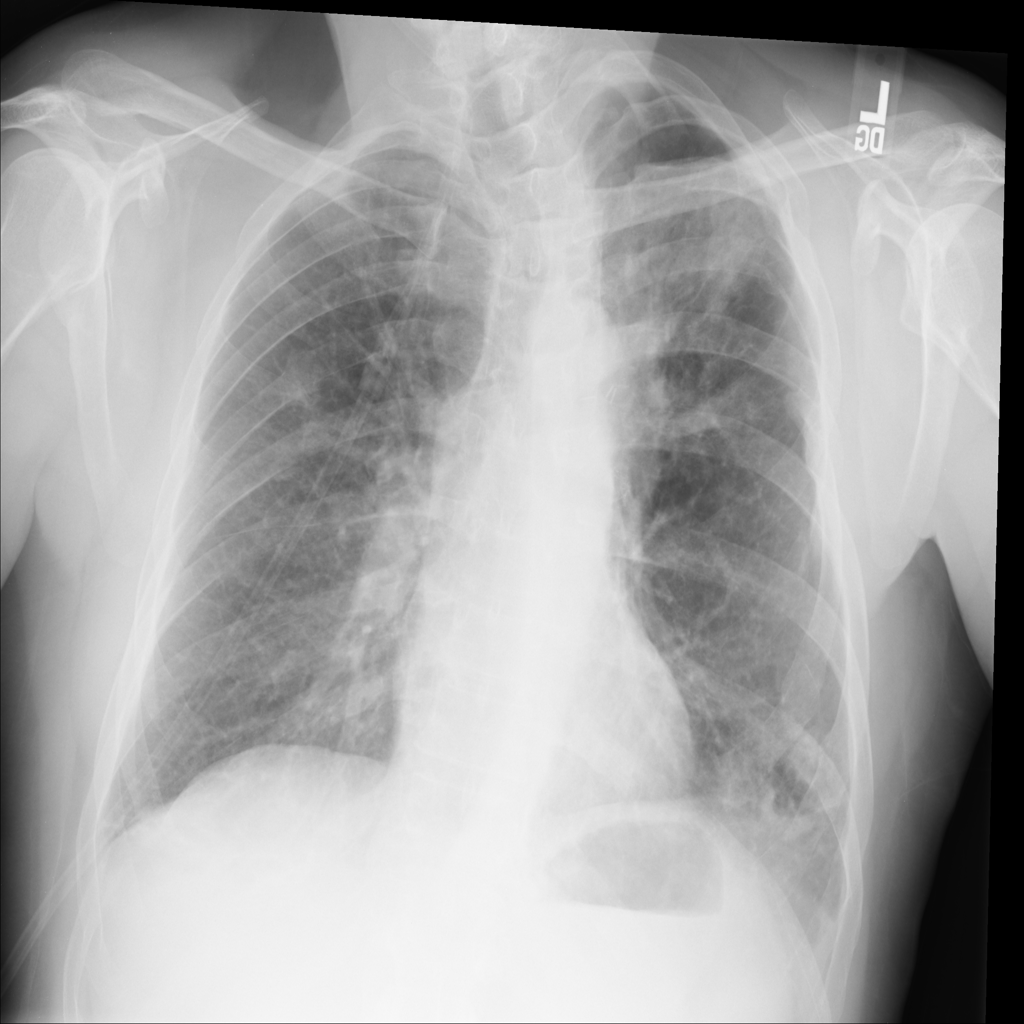

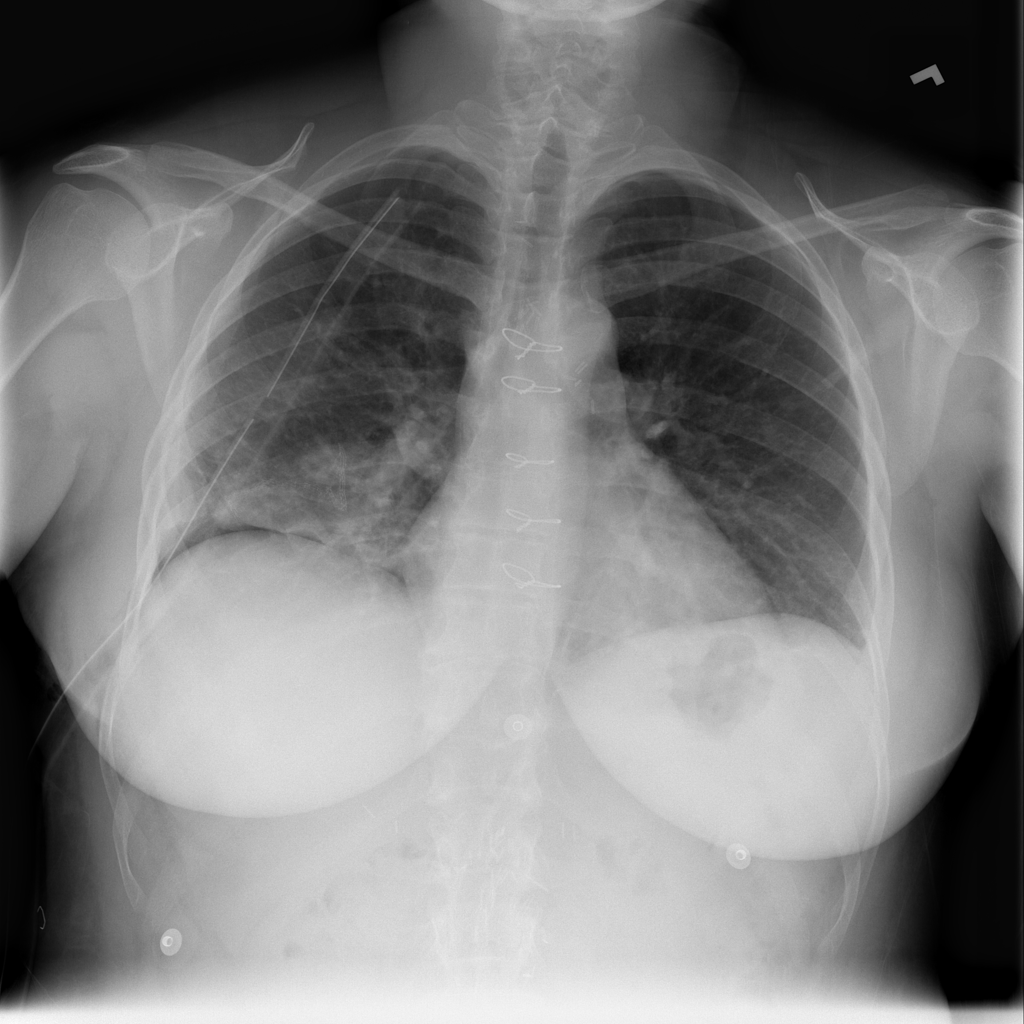

In [45]:
from PIL import Image
from IPython.display import display  # Import display function

# Set image path
images_path = os.path.join(data_path, "images_001/images")

# Get first 5 images
image_filenames = os.listdir(images_path)[:5]
print("Images found:", image_filenames) 

# Display images directly in Jupyter Notebook
for img_filename in image_filenames:
    img_path = os.path.join(images_path, img_filename)
    img = Image.open(img_path)  
    display(img) 
